# <center> Network Analysis - Part 1

## I. Basic of Network Analysis

“A picture speaks a thousand words” is one of the most commonly used phrases. But a graph speaks so much more than that. A visual representation of data, in the form of graphs, not only helps us gain actionable insights but also makes us take better decisions.

To truly understand what graphs are and why they are used in Data Science, we need to understand what a Graph Theory is. 

**Network vs Edges:**
A network consists of `Nodes` and `Edges`. Together, they form a Graph

** Network Analysis :** Network Analysis or Network theory is the study of symmetric relations or asymmetric relations between the nodes. 

Often in the real-world, the terms 'Graph', 'Network' and 'Graph Network' are used interchangebly, especially in Data Science related applications.

<img src="img\Nodes_Edges_Graph.png">

Nodes represent Entites such as individuals in a social network while Edges represent relationships between the entities.

** Metadata:** Nodes and Edges can have associated information to it called Metadata.

<img src="img/Attributes.png">

In the below example:

- Nodes (Hugo, Eric)
- Metadata (id, age)

- Edge (Friendship)
- Metadata (date)

** Applications: ** 

The applications of Graphs in Data Analytics are numerous and vast:

Marketing Analytics – Graphs can be used to figure out the most influential people in a Social Network. Advertisers and Marketers can estimate the biggest bang for the marketing buck by routing their message through the most influential people in a Social Network

Banking Transactions – Graphs can be used to find unusual patterns helping in mitigating Fraudulent transactions. There have been examples where Terrorist activity has been detected by analyzing the flow of money across interconnected Banking networks

Supply Chain – Graphs help in identifying optimum routes for your delivery trucks and in identifying locations for warehouses and delivery centres

Telecom – Telecom companies typically use Graphs (Voronoi diagrams) to understand the quantity and location of Cell towers to ensure maximum coverage

** Why Graphs?:**

- Graphs provide a better way of dealing with abstract concepts like relationships and interactions 
- Graphs are used to model analytics workflows in the form of DAGs (Directed acyclic graphs)
- Graph Theory concepts are used to model Fraud patterns, Power consumption patterns and Virality of articles and videos. 

## II. NetworkX: 

`NetworkX` is the library to use to model, analyze and visualize the network data.

### (i) Nodes and Edges

In [1]:
import networkx as nx            # Import NetworkX API 
import matplotlib.pyplot as plt  # Import Matplotlib

In [2]:
G = nx.Graph()                   # Initialize an empty graph
G.add_nodes_from([1, 2, 3])      # Adds Nodes to the graph

In [3]:
G.nodes()                        # List of nodes in the graph 

[1, 2, 3]

In [4]:
G.add_edge(1, 2)                 # Adds Edges to the graph

In [5]:
G.edges()                        # List of edges in the graph

[(1, 2)]

### (ii) Metadata

In [6]:
G.node[1]['label'] = 'blue'      # Adds metadata to the node

In [7]:
G.nodes(data = True)             # Access metadata 

[(1, {'label': 'blue'}), (2, {}), (3, {})]

### (iii) Draw

C:\Users\Nishu\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Nishu\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Nishu\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Nishu\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:724: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(label):
C:\Users\Nishu\Anaconda3\Lib\site-packages\networkx\drawing\nx_p

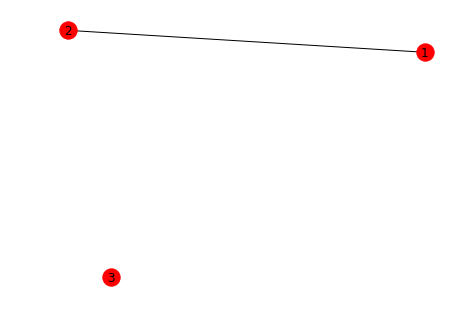

In [10]:
nx.draw(G, with_labels=True)                       # Draws a Node-Link diagram of the Graph 
plt.show()

## III. Analyzing Twitter Data

In [8]:
import os
import pickle

In [9]:
with open('data/twitter.p', 'rb') as f:
    x = nx.read_gpickle(f)

test = nx.read_gpickle("data/twitter.p")

In [66]:
type(x)

networkx.classes.digraph.DiGraph

In [41]:
x.nodes(data = True)[:10]

[(1, {'category': 'I', 'occupation': 'scientist'}),
 (3, {'category': 'P', 'occupation': 'politician'}),
 (4, {'category': 'D', 'occupation': 'celebrity'}),
 (5, {'category': 'I', 'occupation': 'politician'}),
 (6, {'category': 'D', 'occupation': 'politician'}),
 (7, {'category': 'D', 'occupation': 'scientist'}),
 (8, {'category': 'I', 'occupation': 'celebrity'}),
 (9, {'category': 'D', 'occupation': 'celebrity'}),
 (10, {'category': 'I', 'occupation': 'celebrity'}),
 (11, {'category': 'I', 'occupation': 'celebrity'})]

In [44]:
x_n = [(n, d) for n, d in x.nodes(data = True)][:100]

In [42]:
e_n = [(u, v, d) for u, v, d in x.edges(data = True) if u in x_n if v in x_n ]

In [45]:
G = nx.Graph()

In [46]:
G.add_nodes_from(x_n)
G.add_edges_from(e_n)

<div class = "alert alert-warning">
  <strong> NetworkX does not support reading the current version of Twitter pickled file!</strong> 
</div>

** Manually create Nodes and Edges of `Twitter` data **

In [69]:
len(x.nodes())

23369

In [68]:
x.nodes()[:10]

[1, 3, 4, 5, 6, 7, 8, 9, 10, 11]

In [71]:
x.nodes(data = True)[:10]

[(1, {'category': 'I', 'occupation': 'scientist'}),
 (3, {'category': 'P', 'occupation': 'politician'}),
 (4, {'category': 'D', 'occupation': 'celebrity'}),
 (5, {'category': 'I', 'occupation': 'politician'}),
 (6, {'category': 'D', 'occupation': 'politician'}),
 (7, {'category': 'D', 'occupation': 'scientist'}),
 (8, {'category': 'I', 'occupation': 'celebrity'}),
 (9, {'category': 'D', 'occupation': 'celebrity'}),
 (10, {'category': 'I', 'occupation': 'celebrity'}),
 (11, {'category': 'I', 'occupation': 'celebrity'})]

In [73]:
len(x.edges())

33142

In [74]:
x.edges()[:10]

[(1, 3),
 (1, 4),
 (1, 5),
 (1, 6),
 (1, 7),
 (1, 8),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 12)]

In [75]:
x.edges(data = True)[:10]

[(1, 3, {'date': datetime.date(2012, 11, 17)}),
 (1, 4, {'date': datetime.date(2007, 6, 19)}),
 (1, 5, {'date': datetime.date(2014, 3, 18)}),
 (1, 6, {'date': datetime.date(2007, 3, 18)}),
 (1, 7, {'date': datetime.date(2011, 12, 19)}),
 (1, 8, {'date': datetime.date(2013, 12, 7)}),
 (1, 9, {'date': datetime.date(2009, 11, 9)}),
 (1, 10, {'date': datetime.date(2008, 10, 7)}),
 (1, 11, {'date': datetime.date(2008, 8, 14)}),
 (1, 12, {'date': datetime.date(2011, 3, 22)})]

<div class = "alert alert-warning">
  <strong> The pickle file is huge and would raise a Memory error if I plot using my local machine's computation. Hence, I have picked a handful of nodes and edges and visualized the network diagram for the graph. </strong> 
</div>

C:\Users\Nishu\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:126: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  b = plt.ishold()
C:\Users\Nishu\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:522: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if not cb.is_string_like(edge_color) \
C:\Users\Nishu\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:543: MatplotlibDeprecationWarning: The is_string_like function was deprecated in version 2.1.
  if cb.is_string_like(edge_color) or len(edge_color) == 1:
C:\Users\Nishu\Anaconda3\Lib\site-packages\networkx\drawing\nx_pylab.py:138: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Ax

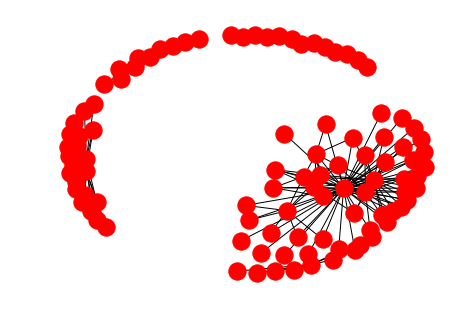

In [49]:
nx.draw(G)              # Draw the graph to screen
plt.show()

** Note:** The red circles are the nodes and the black lines are the edges.

In [50]:
# Choose Nodes with a specific occupation
for n, d in G.nodes(data = True):
    if d['occupation'] == 'scientist':
        print(n, d)

1 {'occupation': 'scientist', 'category': 'I'}
7 {'occupation': 'scientist', 'category': 'D'}
12 {'occupation': 'scientist', 'category': 'I'}
18 {'occupation': 'scientist', 'category': 'P'}
19 {'occupation': 'scientist', 'category': 'P'}
23 {'occupation': 'scientist', 'category': 'D'}
30 {'occupation': 'scientist', 'category': 'I'}
31 {'occupation': 'scientist', 'category': 'P'}
33 {'occupation': 'scientist', 'category': 'P'}
36 {'occupation': 'scientist', 'category': 'I'}
38 {'occupation': 'scientist', 'category': 'I'}
39 {'occupation': 'scientist', 'category': 'P'}
45 {'occupation': 'scientist', 'category': 'D'}
48 {'occupation': 'scientist', 'category': 'P'}
53 {'occupation': 'scientist', 'category': 'P'}
59 {'occupation': 'scientist', 'category': 'D'}
69 {'occupation': 'scientist', 'category': 'I'}
71 {'occupation': 'scientist', 'category': 'P'}
81 {'occupation': 'scientist', 'category': 'D'}
82 {'occupation': 'scientist', 'category': 'D'}
83 {'occupation': 'scientist', 'category':

In [56]:
# Choose Nodes with a specific occupation - List Comprehension
noi = [n for n, d in G.nodes(data = True) if d['occupation'] == 'scientist']

In [57]:
noi

[1,
 7,
 12,
 18,
 19,
 23,
 30,
 31,
 33,
 36,
 38,
 39,
 45,
 48,
 53,
 59,
 69,
 71,
 81,
 82,
 83,
 85,
 101]

In [54]:
import datetime

In [55]:
# Choose Edges of interest
for a, b, c in G.edges(data = True):
    if c['date'] < datetime.date(2010, 1, 1):
        print(c['date'])

2007-06-19
2007-03-18
2009-11-09
2008-10-07
2008-08-14
2007-05-19
2009-12-13
2007-07-08
2007-09-14
2007-03-17
2009-02-19
2007-03-17
2007-11-02
2007-08-19
2009-08-02
2008-09-23
2008-10-18
2008-12-09
2009-04-19
2007-10-27
2007-07-14
2008-07-06
2009-04-12
2009-01-26
2007-05-19
2008-05-19
2008-06-28
2008-05-16
2007-07-23
2009-05-23
2008-10-20
2008-08-12
2008-03-19
2008-03-04
2009-11-06
2009-11-22
2009-04-19
2009-08-12
2009-05-10
2007-12-07
2007-10-06
2008-11-05
2008-01-21
2008-05-25
2007-08-24
2007-01-05
2009-03-13
2009-07-07
2008-09-02
2009-02-10
2009-07-19
2009-12-20
2009-10-14
2008-06-10
2008-12-13
2009-09-01
2009-01-28
2007-07-18
2008-03-19


In [60]:
# Choose Edges of interest - List Comprehension
eoi = [ (a, b) for a, b, c in G.edges(data = True) if c['date'] < datetime.date(2010, 1, 1)]

In [61]:
eoi

[(1, 4),
 (1, 6),
 (1, 9),
 (1, 10),
 (1, 11),
 (1, 14),
 (1, 15),
 (1, 24),
 (1, 26),
 (1, 34),
 (1, 37),
 (1, 38),
 (1, 44),
 (1, 48),
 (11, 19),
 (13, 19),
 (14, 28),
 (15, 28),
 (16, 35),
 (16, 48),
 (16, 36),
 (19, 21),
 (19, 24),
 (19, 31),
 (24, 28),
 (24, 36),
 (27, 28),
 (28, 29),
 (28, 31),
 (28, 44),
 (29, 43),
 (33, 39),
 (35, 36),
 (35, 43),
 (36, 39),
 (37, 43),
 (38, 39),
 (39, 41),
 (41, 45),
 (43, 48),
 (50, 57),
 (50, 58),
 (63, 67),
 (63, 71),
 (63, 72),
 (63, 74),
 (64, 75),
 (65, 75),
 (66, 70),
 (67, 75),
 (71, 75),
 (72, 75),
 (75, 82),
 (84, 85),
 (84, 87),
 (84, 91),
 (84, 93),
 (94, 97),
 (94, 101)]

## IV. Types of Graphs

NetworkX supports following types of graphs:
- Undirected Graphs
- Directed Graphs

### (i) Undirected Graph 
- This graph comprises of node and edges with no direction. <br>
**Example:** A facebook social graph. When you are friend with someone then automatically both of them are friends.  

<img src="img/Undirected Graph.png">

In [62]:
G1 = nx.Graph()
type(G)

networkx.classes.graph.Graph

###  (ii) Directed Graph 
- This graph comprises of node and edges with a direction associated between the nodes. <br>
**Example:** A Twitter social graph. When you follow someone then it doesn't actually mean the other person follows you back.  

<img src="img/Directed Graph.png">

In [63]:
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

### (iii) Multi DiGraph: 
- Graphs with multiple edges between two nodes. <br>
Example: Road trips between bike sharing stations.

<img src="img/MultiDirected Graph.png">

One trip between Node 1 to Node 2 can be represented by an edge. A three trips between these nodes can be represented by three edges. 

In [64]:
M = nx.MultiGraph()
type(M)

networkx.classes.multigraph.MultiGraph

**Note:** Things can get clumsier when multiple nodes have more than 3 edges associated between them.

### (iv) Weighted Graph
- Instead of having three edges between the nodes, you can assign weights to the edges as below: 

<img src="img/Weighted Graph.png">

In [65]:
MD = nx.MultiDiGraph()
type(MD)

networkx.classes.multidigraph.MultiDiGraph

## (v) Self-Loop
- Nodes that are connected to theemselves.

<img src="img/self-loops.png">

In [63]:
D = nx.DiGraph()
type(D)

networkx.classes.digraph.DiGraph

In [66]:
# Function to find self-loops 
def find_selfloop_nodes(G):
    
    nodes_in_selfloops = []
    
    for u, v in G.edges():               # Iterate over all the edges of G    
        if u == v:                       # Check if node u and node v are the same
            nodes_in_selfloops.append(u) # Append node u to nodes_in_selfloops
            
    return nodes_in_selfloops, len(nodes_in_selfloops)            # Return nodes with self-loops

In [71]:
# Number of self-loops in the Directed graph 'D'
self_loops, num_of_self_loops = find_selfloop_nodes(x)

In [72]:
num_of_self_loops

42

In [73]:
self_loops

[365,
 1201,
 1851,
 2124,
 3713,
 3753,
 3824,
 5881,
 6420,
 6610,
 6892,
 7430,
 7853,
 8220,
 8289,
 8580,
 8822,
 8881,
 9370,
 9919,
 10194,
 10913,
 12177,
 13116,
 13246,
 14919,
 15987,
 16492,
 16823,
 17393,
 18913,
 19173,
 19231,
 19617,
 19806,
 21026,
 21239,
 21636,
 21759,
 22101,
 22374,
 22547]

## V. Network Visualization

- Matrix Plots
- Arc Plots
- Circos Plots

### Matrix Plots
In a matrix plot, the rows and columns are the nodes of the graph and the cells are filled based on whether there is a edge between the respective nodes.

For the following undirected graph,

<img src="img/Matrix_Plot_1.png">

The matrix plot looks like this:

<img src="img/Matrix_Plot_2.png">

**Note:** Since the above graph is undirected, the matrix plot is symmetrical along the diagonal. 

The matrix representation of a directed graph is not necessarily symmetrical along the diagonal. 

For the following directed graph,

<img src="img/Matrix_Plot_3.png">

The matrix plot looks like this:

<img src="img/Matrix_Plot_4.png">

**Note:** The matrix plot is NOT symmetrical along the diagonal. 

### (ii) Arc Plots
- Transformations of node-link diagram where nodes are ordered along one axis of the plot and edges are drawn using arcs between the nodes. 

For the undirected graph, 

<img src="img/Matrix_Plot_1.png">

The Arc plot looks like this:

<img src="img/Arc_plot.png">

**Note:** The ordering can be `alphabetical`, `chronological` or based on a any `attribute of interest`.

### (iii) Circos Plot:
A circos plot is the transformation of the arc plot such that the two ends of the arc plot are joined together to form a circle.

<img src = "img/Circos_Plot.png">

### Visualizing Matrix Plot

In [74]:
import nxviz as nv

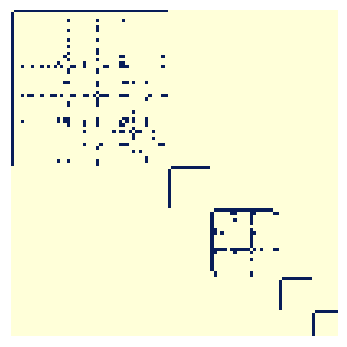

In [75]:
m = nv.MatrixPlot(G)
m.draw()
plt.show()

** Note: ** You can convert the graph to a nxn numpy array using `NetworkX` built-in function `to_numpy_matrix`

In [76]:
# Convert T to a matrix format: A
A = nx.to_numpy_matrix(G)
A

matrix([[ 0.,  1.,  1., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        [ 1.,  0.,  0., ...,  0.,  0.,  0.],
        ..., 
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.],
        [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

### Visualizing Arc Plot

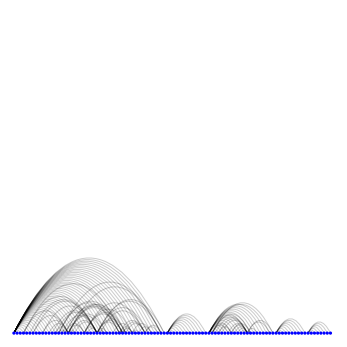

In [77]:
from nxviz import ArcPlot          # Import necessary module

a = ArcPlot(G)                     # Create the un-customized ArcPlot object: a
a.draw()                           # Draw a to the screen
plt.show()                         # Display the plot

### Visualizing Circos Plot

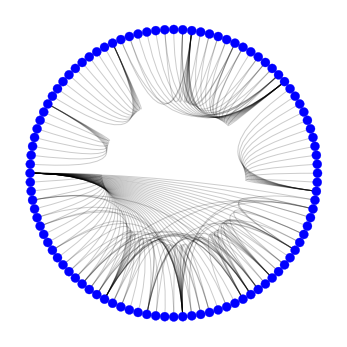

In [78]:
from nxviz import CircosPlot        # Import necessary modules

c = CircosPlot(G)                   # Create the CircosPlot object: c
c.draw()                            # Draw c to the screen

plt.show()                          # Display the plot

** Note: ** The blue circles are the Nodes while the arcs are the edges. 

The nodes are sorted numerically.

## VI. Degree Centrality

**Degree**: The degree of a node is the number of neighbors that it has. <br>
**Degree Centrality** is used to find the most important node in a Graph. Mathemetically, it can be written as:

$$ \frac{​​Number​​of​​neighbors​​a​​given​​node​​of​​interest​​has​​}{​​Number​​of​​neighbors​​a​​given​​node​​of​​interest​​could​​possible​​have​​}  ​​$$

**Note:** Depending on whether self-loops are allowed, the set of possible neighbors a node could have could also include the node itself.

Degree Centrality is useful in finding:
- Social Influencers
- Major Holiday Destinations

In [79]:
# Finding the neighbors of a node
list(G.neighbors(16))

[1, 35, 18, 48, 36]

In [145]:
# NetworkX throws an error if you try to access the neighbors of the nodes that are not in the Graph
list(D.neighbors(2))

NetworkXError: The node 2 is not in the digraph.

In [84]:
# Compute the degree of every node: degrees
degrees = [ len(G.neighbors(n)) for n in G.nodes()]

# Print the degrees
print(degrees)

[47, 1, 1, 4, 1, 2, 3, 1, 1, 3, 1, 2, 2, 3, 5, 3, 5, 16, 3, 3, 1, 1, 8, 2, 1, 2, 22, 3, 3, 3, 1, 2, 1, 9, 11, 7, 2, 9, 2, 3, 1, 8, 2, 3, 1, 2, 5, 2, 12, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 18, 7, 2, 3, 2, 1, 3, 5, 2, 2, 2, 2, 15, 4, 1, 2, 1, 1, 1, 2, 2, 9, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 1, 1, 1, 1, 1, 1, 1]


In [81]:
# Finding the degree centrality of every node 
nx.degree_centrality(G)

{1: 0.4747474747474748,
 3: 0.010101010101010102,
 4: 0.010101010101010102,
 5: 0.04040404040404041,
 6: 0.010101010101010102,
 7: 0.020202020202020204,
 8: 0.030303030303030304,
 9: 0.010101010101010102,
 10: 0.010101010101010102,
 11: 0.030303030303030304,
 12: 0.010101010101010102,
 13: 0.020202020202020204,
 14: 0.020202020202020204,
 15: 0.030303030303030304,
 16: 0.05050505050505051,
 17: 0.030303030303030304,
 18: 0.05050505050505051,
 19: 0.16161616161616163,
 20: 0.030303030303030304,
 21: 0.030303030303030304,
 22: 0.010101010101010102,
 23: 0.010101010101010102,
 24: 0.08080808080808081,
 25: 0.020202020202020204,
 26: 0.010101010101010102,
 27: 0.020202020202020204,
 28: 0.22222222222222224,
 29: 0.030303030303030304,
 30: 0.030303030303030304,
 31: 0.030303030303030304,
 32: 0.010101010101010102,
 33: 0.020202020202020204,
 34: 0.010101010101010102,
 35: 0.09090909090909091,
 36: 0.11111111111111112,
 37: 0.07070707070707072,
 38: 0.020202020202020204,
 39: 0.0909090909090

** Note: ** Degree centrality does not consider `self-loops`.

In [82]:
# Define nodes_with_m_nbrs()
def nodes_with_m_nbrs(G, m):
    
    nodes = set()
    
    for n in G.nodes():                       # Iterate over all nodes in G
        if len(list(G.neighbors(n))) == m:    # Check if the number of neighbors of n matches m
            nodes.add(n)                      # Add the node n to the set
    return nodes                              # Return the nodes with m neighbors

In [83]:
six_nbrs = nodes_with_m_nbrs(G, 4)            # Compute and print all nodes in T that have 6 neighbors
print(six_nbrs)

{76, 5}


### Degree centrality distribution

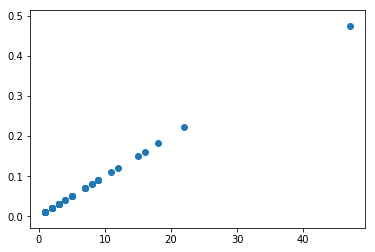

In [85]:
# Import matplotlib.pyplot
import matplotlib.pyplot as plt

# Compute the degree centrality of the Twitter network: deg_cent
deg_cent = nx.degree_centrality(G)

# Compute the degree of every node: degrees
degrees = [len(list(G.neighbors(n))) for n in G.nodes()]

# Plot a scatter plot of the centrality and the nodes
plt.figure()
plt.scatter(x = degrees, y = list(deg_cent.values()))
plt.show()

In [155]:
deg_cent = nx.degree_centrality(D)

## VII. Graph Algorithms

Graph Algorithms such as Bread First Search helps in finding paths:

- Optimization (Shortest transport paths)
- Modeling (Information passing, Finding path in which a disease is being spread)

Pathfinding algorithms are important because they provide another way of assessing node importance.

In [169]:
# Define path_exists()
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    
    # Initialize the queue of cells to visit with the first node: queue
    queue = [node1]
    
    # Iterate over the nodes in the queue
    for node in queue:
    
        # Get neighbors of the node
        neighbors = G.neighbors(node) 
        
        # Check to see if the destination node is in the set of neighbors
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

In [170]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break
        
        else:
            # Add current node to visited nodes
            visited_nodes.add(node)
            
            # Add neighbors of current node that have not yet been visited
            queue.extend([n for n in neighbors if n not in visited_nodes])

In [171]:
def path_exists(G, node1, node2):
    """
    This function checks whether a path exists between two nodes (node1, node2) in graph G.
    """
    visited_nodes = set()
    queue = [node1]
    
    for node in queue:  
        neighbors = G.neighbors(node)
        if node2 in neighbors:
            print('Path exists between nodes {0} and {1}'.format(node1, node2))
            return True
            break

        else:
            visited_nodes.add(node)
            queue.extend([n for n in neighbors if n not in visited_nodes])
        
        # Check to see if the final element of the queue has been reached
        if node == queue[-1]:
            print('Path does not exist between nodes {0} and {1}'.format(node1, node2))

            # Place the appropriate return statement
            return False

## VIII. Betweenness Centrality

Betweeness Centrality is helpful in finding the shortest path and is defined as 

$$ \frac{​​Number​​of​​shortest​​paths​​passing​​through​​a​​node​​}{​​Total​​Number​​of​​shortest​​paths​​} ​​$$

Betweeness Centrality captures the bottle-neck nodes rather than highly connected nodes.

Assume that you have two clusters in a network. Betweeness Centrality captures the nodes that connect these two clusters.

<img src = "img/Betweenness_Centrality.png">

**Application:**
- Individuals that bridges two communities
- Major subway stations connecting two parts of the city

The above graph is called a bar-bell graph.

- m1 = number of nodes in the bar-bell ends
- m2 = number of nodes in the bridge connecting the two ends

In [172]:
# Creating a bar-bell graph
G = nx.barbell_graph(m1 = 5, m2 = 1)
nx.betweenness_centrality(G)

{0: 0.0,
 1: 0.0,
 2: 0.0,
 3: 0.0,
 4: 0.5333333333333333,
 5: 0.5555555555555556,
 6: 0.5333333333333333,
 7: 0.0,
 8: 0.0,
 9: 0.0,
 10: 0.0}

** Note: ** You can see that there are nodes that have a betweenness centrality of 0. That is because they are located at the end of the bar-bell graphs and do not contribute to the shortest path as much as the 3 nodes in the middle do.

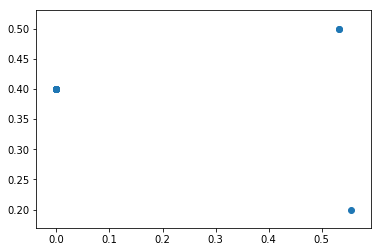

In [173]:
# Compute the betweenness centrality of T: bet_cen
bet_cen = nx.betweenness_centrality(G)

# Compute the degree centrality of T: deg_cen
deg_cen = nx.degree_centrality(G)

# Create a scatter plot of betweenness centrality and degree centrality
plt.scatter(x = list(bet_cen.values()), y = list(deg_cen.values()))

# Display the plot
plt.show()

In [176]:
# Define find_nodes_with_highest_deg_cent()
def find_nodes_with_highest_deg_cent(G):

    # Compute the degree centrality of G: deg_cent
    deg_cent = nx.degree_centrality(G)
    
    # Compute the maximum degree centrality: max_dc
    max_dc = max(list(deg_cent.values()))
    
    nodes = set()
    
    # Iterate over the degree centrality dictionary
    for k, v in deg_cent.items():
    
        # Check if the current value has the maximum degree centrality
        if v == max_dc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes
    
# Find the node(s) that has the highest degree centrality in T: top_dc
top_dc = find_nodes_with_highest_deg_cent(D)
print(top_dc)

{1}


In [178]:
# Define find_node_with_highest_bet_cent()
def find_node_with_highest_bet_cent(G):

    # Compute betweenness centrality: bet_cent
    bet_cent = nx.betweenness_centrality(G)
    
    # Compute maximum betweenness centrality: max_bc
    max_bc = max(list(bet_cent.values()))
    
    nodes = set()
    
    # Iterate over the betweenness centrality dictionary
    for k, v in bet_cent.items():
    
        # Check if the current value has the maximum betweenness centrality
        if v == max_bc:
        
            # Add the current node to the set of nodes
            nodes.add(k)
            
    return nodes

# Use that function to find the node(s) that has the highest betweenness centrality in the network: top_bc
top_bc = find_node_with_highest_bet_cent(D)
print(top_bc)

{16, 18}


## IX. Cliques & Communities

This is very useful to analyze a sub-graph

Social Clique: Tightly-knit groups
Network Clique: Completely connected graphs

<img src = "img/Network_Clique.png">

**Application:**
- Friend Recommendation System

If A is friends with B and C, then it is highly likely that B and C know each other. This process of providing recommendations by connecting triangles is called a **'Triangle Closure'**.

<img src = "img/Friend_Recommendation_System.png">

In [180]:
from itertools import combinations
for n1, n2 in combinations(G.nodes(), 2):
    print(n1, n2)

0 1
0 2
0 3
0 4
0 6
0 7
0 8
0 9
0 10
0 5
1 2
1 3
1 4
1 6
1 7
1 8
1 9
1 10
1 5
2 3
2 4
2 6
2 7
2 8
2 9
2 10
2 5
3 4
3 6
3 7
3 8
3 9
3 10
3 5
4 6
4 7
4 8
4 9
4 10
4 5
6 7
6 8
6 9
6 10
6 5
7 8
7 9
7 10
7 5
8 9
8 10
8 5
9 10
9 5
10 5


In [181]:
from itertools import combinations

# Define is_in_triangle() 
def is_in_triangle(G, n):

    in_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if an edge exists between n1 and n2
        if G.has_edge(n1, n2):
            in_triangle = True
            break
    return in_triangle

In [184]:
from itertools import combinations

# Write a function that identifies all nodes in a triangle relationship with a given node.
def nodes_in_triangle(G, n):

    triangle_nodes = set([n])
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 have an edge between them
        if G.has_edge(n1, n2):
        
            # Add n1 to triangle_nodes
            triangle_nodes.add(n1)
            
            # Add n2 to triangle_nodes
            triangle_nodes.add(n2)
            
    return triangle_nodes
    
# Write the assertion statement
print(len(nodes_in_triangle(D, 1)))

13


In [186]:
from itertools import combinations

# Define node_in_open_triangle()
def node_in_open_triangle(G, n):
    """
    Checks whether pairs of neighbors of node `n` in graph `G` are in an 'open triangle' relationship with node `n`.
    """
    in_open_triangle = False
    
    # Iterate over all possible triangle relationship combinations
    for n1, n2 in combinations(G.neighbors(n), 2):
    
        # Check if n1 and n2 do NOT have an edge between them
        if not G.has_edge(n1, n2):
        
            in_open_triangle = True
            
            break
            
    return in_open_triangle

# Compute the number of open triangles in T
num_open_triangles = 0

# Iterate over all the nodes in T
for n in G.nodes():

    # Check if the current node is in an open triangle
    if node_in_open_triangle(G, n):
    
        # Increment num_open_triangles
        num_open_triangles += 1
        
print(num_open_triangles)

3


## X. Maximal Cliques

A maximal clique is a clique that cannot be extended any further by adding one nodes

<img src = "img/Maximal_Clique.png">

Let's go-back to the bar-bell graph:

<img src = "img/Betweenness_Centrality.png">

In [187]:
G = nx.barbell_graph(m1 = 5, m2 = 1)
nx.find_cliques(G)

<generator object find_cliques at 0x000000000F1BC0F8>

In [188]:
list(nx.find_cliques(G))

[[4, 0, 1, 2, 3], [4, 5], [6, 5], [6, 7, 8, 9, 10]]

We notice that there are two maximal cliques here:

<img src = "img/Maximal_Clique_1.png">

## XI. Subgraphs

Subgraphs are special form of cliques where each node does note have to connected to the other.

<strong> Erdos Renyi Graph </strong> can be created by specifying the number of nodes and the edges are drawn between them based on the probability we pass as an argument.

In [224]:
G = nx.erdos_renyi_graph(n = 20, p = 0.2)
G.nodes()

NodeView((0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19))

In [225]:
G.edges()

EdgeView([(0, 1), (0, 8), (0, 13), (0, 19), (1, 4), (1, 15), (1, 16), (1, 18), (2, 4), (3, 6), (3, 7), (3, 8), (3, 17), (4, 5), (4, 7), (4, 8), (4, 12), (4, 14), (4, 17), (5, 15), (5, 16), (5, 18), (5, 19), (6, 10), (7, 16), (7, 17), (8, 9), (8, 16), (10, 15), (11, 13), (11, 18), (12, 15), (13, 15), (14, 15), (16, 17)])

In [226]:
# Neighboring Nodes
nodes = G.neighbors(1)

In [227]:
# Returns a Dictionary
nodes

In [228]:
# Converting a dictionary to a list
nodes = list(nodes)

In [229]:
# Appending Node(8) to the list of nodes
nodes.append(8)

In [230]:
# Create a subgraph with Neighboring nodes and Node 8
G_eight = G.subgraph(nodes)

In [233]:
# Neighboring Nodes
G_eight.nodes()

NodeView((0, 4, 8, 15, 16, 18))

In [231]:
# Edges with Node 8
G_eight.edges()

EdgeView([(0, 8), (4, 8), (8, 16)])

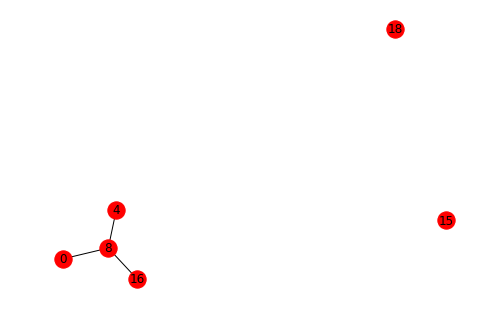

In [232]:
nx.draw(G_eight, with_labels=True)
plt.show()

** Note: ** In the above graph, Node 18 and 15 are not connected because Node-8 does not share any edges with the. However, they are included in the graph since they are the neighbors of Node-8 

## XII. Case Study

### Data:

- Github User Collaboration Network
- Nodes: Users
- Edges: Collaboration on same Github repository

### Goal: 
1. Analyze Structure
2. Visualize
3. Build Simple Recommendation System to connect users